In [1]:
!pip install scikit-learn

In [7]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\user\miniconda3\envs\py\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')

In [4]:
x_train = train_df.drop(['Son'], axis=1)    #train_df['Father']
x_test = test_df.drop(['Son'], axis=1)
y_train = train_df['Son']
y_test = test_df['Son']

In [5]:
x_train = x_train.to_numpy()                # x_train.values
x_test = x_test.to_numpy()

### 아버지의 키를 입력하면 아들의 키를 예측
### 가장 단순한 선형회귀 사용

In [7]:
from sklearn.linear_model import LinearRegression   #wx+b공식을 제공하는 estimator


model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
model.coef_, model.intercept_

(array([0.51820601]), 85.30837062148483)

#### 트레이닝 자료값의 오차가 작아야, w,b를 사용할 수 있음
#### 훈련자료의 오차를 확인
### 오차의 종류(MSE)
#### 1번 = y_train 값 - (x_train*model.coef_+model.intercept_)
##### 2번 = 각각 항목을 1번의 제곱근으로 작업 후, 더한 뒤 평균을 낸다

In [9]:
print(model.score(x_test, y_test)) # R2제곱(회귀공식에서만사용)이라는 공식, 1에 가까울 수록 좋다.

0.25199779058466176


In [10]:
## 위의 자료가 잘 되었다면, w,b값이 잘 fit되어 스코어 값이 좋다면
### 테스트자료에 사용
#### 스코어 값에서 확인 or 다른 방법으로 확인 하든 결과 값이 좋으면
#### 기존의 y값과 비교가 가능하므로, y값이 존재하지 않는 자료에 넣어서 사용
model.predict(x_test)

array([168.62656977, 171.39068065, 171.12743199, 173.23342123,
       176.78727806, 170.46931036, 171.6539293 , 174.68128883,
       176.65565374, 167.44195083, 170.2060617 , 169.41631574,
       171.39068065, 175.73428345, 171.91717796, 171.91717796,
       172.97017257, 175.07616181, 174.5496645 , 173.36504556,
       173.62829421, 174.41804017, 175.20778614, 175.73428345,
       176.26078076, 176.91890239, 177.97189701, 179.02489163,
       181.7890025 , 170.33768603, 172.70692392, 171.78555363,
       172.31205094, 172.97017257, 175.47103479, 176.39240508,
       175.60265912, 177.97189701, 184.02661606, 172.04880228,
       174.94453748, 177.70864836, 177.31377537, 177.97189701,
       180.20951057, 184.55311337, 171.6539293 , 176.12915643,
       177.05052672, 179.02489163, 181.39412952, 174.02316719,
       173.89154287, 175.73428345, 175.86590777, 177.31377537,
       179.94626192, 174.68128883, 181.92062683, 177.31377537,
       176.78727806, 174.81291316, 166.65220487, 170.73

In [11]:
test1_ypredict=160.782*model.coef_+model.intercept_
test2_ypredict=116.116*model.coef_+model.intercept_
test1_ypredict, test2_ypredict

(array([168.62656977]), array([145.48038001]))

In [12]:
model.predict(x_test)

array([168.62656977, 171.39068065, 171.12743199, 173.23342123,
       176.78727806, 170.46931036, 171.6539293 , 174.68128883,
       176.65565374, 167.44195083, 170.2060617 , 169.41631574,
       171.39068065, 175.73428345, 171.91717796, 171.91717796,
       172.97017257, 175.07616181, 174.5496645 , 173.36504556,
       173.62829421, 174.41804017, 175.20778614, 175.73428345,
       176.26078076, 176.91890239, 177.97189701, 179.02489163,
       181.7890025 , 170.33768603, 172.70692392, 171.78555363,
       172.31205094, 172.97017257, 175.47103479, 176.39240508,
       175.60265912, 177.97189701, 184.02661606, 172.04880228,
       174.94453748, 177.70864836, 177.31377537, 177.97189701,
       180.20951057, 184.55311337, 171.6539293 , 176.12915643,
       177.05052672, 179.02489163, 181.39412952, 174.02316719,
       173.89154287, 175.73428345, 175.86590777, 177.31377537,
       179.94626192, 174.68128883, 181.92062683, 177.31377537,
       176.78727806, 174.81291316, 166.65220487, 170.73

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

In [14]:
model=LinearRegression()
model.fit(x_data, y_data)
print(model.coef_,model.intercept_)

#[2,1]의 예측값은?
2*model.coef_[0]+1*model.coef_[1]+model.intercept_, model.predict(x_data)[0]

x_data[:,0]
print(model.coef_[0],"가중치")
print(model.intercept_, "bias")

"""
x0 결과 = x_data[:,0]*model.coef_[0]
x1 결과 = x_data[:,1]*model.coef_[1]
y에측값 = x0결과 + x1결과 + model.intercept_
"""



[0.14726495 0.03377002] -0.3717131697471452
0.1472649460838363 가중치
-0.3717131697471452 bias


'\nx0 결과 = x_data[:,0]*model.coef_[0]\nx1 결과 = x_data[:,1]*model.coef_[1]\ny에측값 = x0결과 + x1결과 + model.intercept_\n'

In [15]:
print(model.predict(x_data))

[-0.04341326  0.13762171  0.20516175  0.53346166  0.82799155  0.09166682
  1.11033658  1.29137154  0.91711675  1.02121139  0.84957671  0.0578968 ]


데이터 단일값: ['a' 'b' 'c' 'd' 'e' 'f']
단일값대비 데이터: [6 3 1 1 1 1]


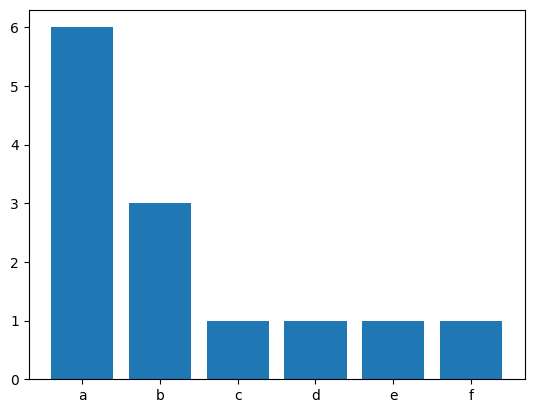

a ==> 0.46153846153846156
b ==> 0.23076923076923078
c ==> 0.07692307692307693
d ==> 0.07692307692307693
e ==> 0.07692307692307693
f ==> 0.07692307692307693


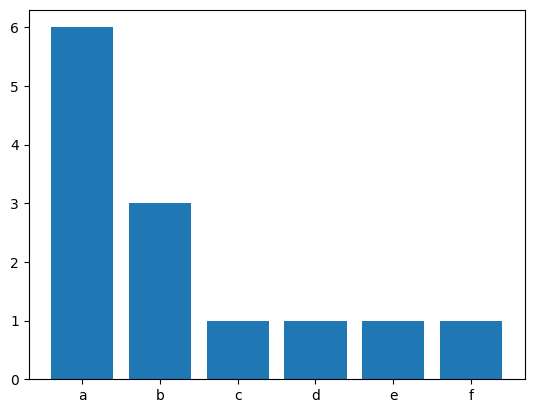

In [17]:
def un(y_data):
    import numpy as np
    import matplotlib.pyplot as plt
    uniqueData = np.unique(y_data, return_counts=True)
    print("데이터 단일값:",uniqueData[0])
    print("단일값대비 데이터:",uniqueData[1])
    plt.bar(uniqueData[0],uniqueData[1])
    plt.show(0)

    for x in range(len(uniqueData[0])):
        print(uniqueData[0][x],"==>",uniqueData[1][x]/np.sum(uniqueData[1]))

un(['a,b,a,b,a,b,a,a,c,a,d,e,f'.split(',')])


##### 훈련, 테스트 데이터 나누기 : 데이터 편향없이 잘 나눔, "훈련자료에는 모든 클레스가 다 있어야함"
### train_test_split()

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1,
                                                    random_state=777,
                                                    stratify=y_data)
np.unique(y_train, return_counts=True), np.unique(y_test,return_counts=True)

((array([0, 1]), array([4, 6], dtype=int64)),
 (array([0, 1]), array([1, 1], dtype=int64)))

데이터 단일값: [0 1]
단일값대비 데이터: [4 6]


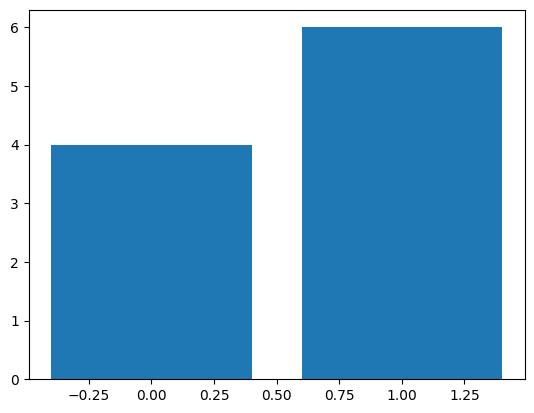

0 ==> 0.4
1 ==> 0.6


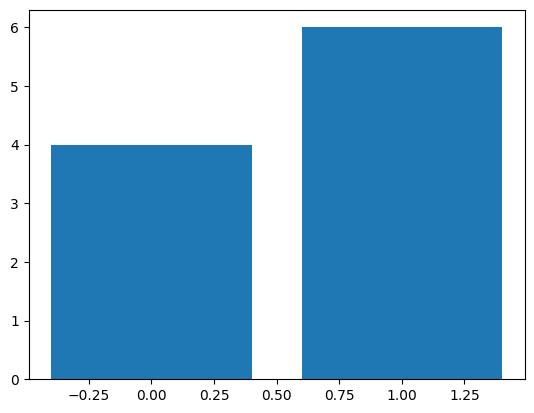

In [147]:
un(y_train)

In [18]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_predict = model.predict(x_train)


# 내가 직접 만드는 score값
result = y_predict == y_train
np.unique(result, return_counts=True)

c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


ValueError: Unknown label type: 'continuous'

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

##########데이터 분석

##########데이터 전처리

x_train = train_df.drop(['가격'], axis=1)
x_test = test_df.drop(['가격'], axis=1)
y_train = train_df['가격']
y_test = test_df['가격']

In [20]:
x_train.head()

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [21]:
np.unique(x_train['종류'])
x_train.head(8)

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
5,2015,중형,12.4,200,44.5,디젤,0,2199,1864,자동
6,2015,중형,13.8,200,44.5,디젤,0,2199,1799,자동
7,2014,소형,14.1,100,13.6,가솔린,0,1368,1095,자동


In [22]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['종류']),
    remainder='passthrough')
# fit은 Train에만!!!
transformer.fit(x_train)
# transform은 table -> 배열로 만든 것
transformer.transform(x_train)

array([[0.0, 0.0, 1.0, 0.0, 2015, 11.8, 172, 21.0, '가솔린', 0, 1999, 1300,
        '자동'],
       [0.0, 0.0, 1.0, 0.0, 2015, 12.3, 204, 27.0, '가솔린', 0, 1591, 1300,
        '자동'],
       [0.0, 1.0, 0.0, 0.0, 2015, 15.0, 100, 13.6, '가솔린', 0, 1368, 1035,
        '수동'],
       [0.0, 1.0, 0.0, 0.0, 2014, 14.0, 140, 17.0, '가솔린', 0, 1591, 1090,
        '자동'],
       [1.0, 0.0, 0.0, 0.0, 2015, 9.6, 175, 46.0, '디젤', 0, 2497, 1990,
        '자동'],
       [0.0, 0.0, 0.0, 1.0, 2015, 12.4, 200, 44.5, '디젤', 0, 2199, 1864,
        '자동'],
       [0.0, 0.0, 0.0, 1.0, 2015, 13.8, 200, 44.5, '디젤', 0, 2199, 1799,
        '자동'],
       [0.0, 1.0, 0.0, 0.0, 2014, 14.1, 100, 13.6, '가솔린', 0, 1368, 1095,
        '자동'],
       [0.0, 0.0, 0.0, 1.0, 2015, 10.8, 245, 36.0, '가솔린', 0, 1998, 1570,
        '자동'],
       [0.0, 1.0, 0.0, 0.0, 2015, 14.0, 100, 13.6, '가솔린', 0, 1368, 1103,
        '자동'],
       [0.0, 0.0, 1.0, 0.0, 2015, 13.8, 184, 41.0, '디젤', 0, 1995, 1548,
        '자동'],
       [0.0, 0.0, 0.0, 1.0, 2015, 11.

### [문자->숫자로 변환]레벨 인코딩(교재 117)
 - 문자로 된 y값을 숫자로 변형해야할 때 필수
    - fit은 값을 unique하게 바뀌면서 0,1,2,3.. 값을 할당
    - transform은 fit된 값을 y값에 적용
 - 트레이닝하고 테스트 나누기 전에 처음으로 숫자로 변경한 뒤, 트레인과 테스트 자료로 나누는 것을 권장
 - 만약 나뉘어져 있는 자료라면 train에만 fit과 transform을 전부 진행
    - test는 transform만 진행

In [23]:
items=('tv, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서, 믹서').split(',')
    
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(items) ## items 중복제거, 0,1,2,3,4 index를 갖게 함.
# 중복제거
print(encoder.classes_)
#fit에서 나온 결과물을 items에 적용
encoder.transform(items)

[' 냉장고' ' 믹서' ' 선풍기' ' 전자레인지' ' 컴퓨터' 'tv']


array([5, 0, 3, 4, 2, 1, 1])

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#fir과 transform을 동시에 진행, 절대 TEST에는 하면 안된다.
encoder.fit_transform(items)

array([5, 0, 3, 4, 2, 1, 1], dtype=int64)

### [문자->숫자로 변환]One Hot 인코딩(교재 118)
 - x값에 주로 사용 (0,1 외의 3개 이상의 카테고리 변수는 원핫인코딩 권장[Pandas의 더미변수])
 ![image.png](attachment:image.png)
 - 더미변수
 - 원핫인코딩()
 - 인공지능에서는 y값도 이항 또는 다항분류를 softmax 함수 적용할 때는 반드시 원핫인코딩해야 함



In [25]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
items=('tv, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서, 믹서').split(',')
items = np.array(items).reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_encoder.categories_


[array([' 냉장고', ' 믹서', ' 선풍기', ' 전자레인지', ' 컴퓨터', 'tv'], dtype='<U6')]

In [26]:
oh_labels = oh_encoder.transform(items) # sparse matrix : 0 값이 많은 행렬(희소행렬)
arrayData = oh_labels.toarray()
arrayData

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

## 참고 ArrayData를 다시 문자로 바꾸는 법

In [27]:
orig_items = oh_encoder.inverse_transform(arrayData)
orig_items = np.ravel(orig_items)
orig_items

array(['tv', ' 냉장고', ' 전자레인지', ' 컴퓨터', ' 선풍기', ' 믹서', ' 믹서'], dtype='<U6')

In [28]:
classData = [' 냉장고', ' 믹서', ' 선풍기', ' 전자레인지', ' 컴퓨터', 'tv']
maxindex = np.argmax(arrayData, axis=1) #행 단위로 가장 큰 값 찾기
for x in maxindex:
    print(classData[x])

tv
 냉장고
 전자레인지
 컴퓨터
 선풍기
 믹서
 믹서


### [문자 -> 숫자로 변환] 더미변수화(교재 119)
 - 카테고리에 해당하는 문자변수를 날개의 필드로 쪼갬
 - 문제점 : 카테고리로 나눈 unique 갯수가 너무 많으면 x변수로 전부 처리가 안됨(DATA의 한계)
 - 해결방법 : lasso 모듈을 사용(L1 정규화)
 - 교재 121 페이지의 get_dummies

### 스케일링 방법
 - 표준화 => StandardScaler(교재 123)
 - 정규화 => 값의 범위를 0 ~ 1사이로 변경(minmax, 교재 125쪽)

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

In [30]:
df = pd.concat([train_df, test_df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      102 non-null    int64  
 1   년식      102 non-null    int64  
 2   종류      102 non-null    object 
 3   연비      102 non-null    float64
 4   마력      102 non-null    int64  
 5   토크      102 non-null    float64
 6   연료      102 non-null    object 
 7   하이브리드   102 non-null    int64  
 8   배기량     102 non-null    int64  
 9   중량      102 non-null    int64  
 10  변속기     102 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 8.9+ KB


c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current fo

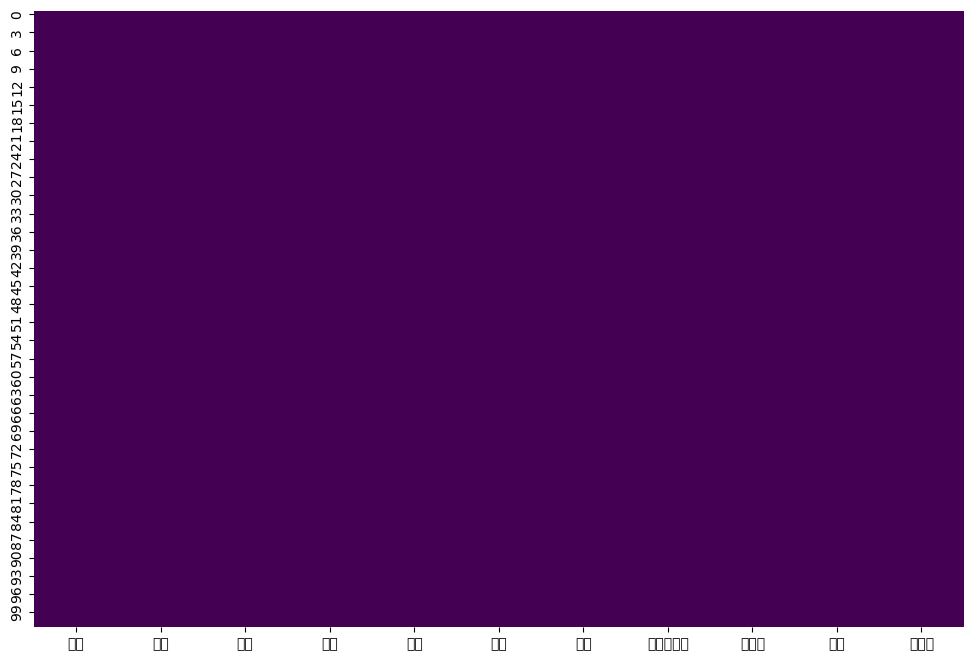

In [31]:
## 머신러닝에는 결측치가 있으면 안된다.
tmp = df.isnull().sum()
#plt.bar(tmp.index, tmp)

# 결측치 시각화를 통해서 빠르게 확인 가능
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8)) # 그래프 크기를 조절
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [32]:
## x,y변수 나누고, y값에 영향을 주는 x값을 알기 위해서는 EDA를 실행해야함
## 현대자동차 가격을 예측하는 회귀분석

y_data = df['가격']
x_data = df.drop(['가격'], axis=1)
y_data
x_data

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
97,2015,대형,8.9,334,40.3,가솔린,0,3778,1915,자동
98,2015,대형,8.7,175,46.0,디젤,0,2497,2383,수동
99,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
100,2010,소형,13.0,95,12.7,가솔린,0,1399,1046,자동


In [33]:
## x데이터의 문자형식이 어떤 자료가 있는지 확인
df.dtypes

가격         int64
년식         int64
종류        object
연비       float64
마력         int64
토크       float64
연료        object
하이브리드      int64
배기량        int64
중량         int64
변속기       object
dtype: object

In [34]:
## 문자자료의 원핫인코딩화
#종류, 연료, 변속기 == object인 data 처리
xdummy=pd.get_dummies(x_data)
xdummy

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,11.8,172,21.0,0,1999,1300,False,False,True,False,False,True,False,False,True
1,2015,12.3,204,27.0,0,1591,1300,False,False,True,False,False,True,False,False,True
2,2015,15.0,100,13.6,0,1368,1035,False,True,False,False,False,True,False,True,False
3,2014,14.0,140,17.0,0,1591,1090,False,True,False,False,False,True,False,False,True
4,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2015,8.9,334,40.3,0,3778,1915,True,False,False,False,False,True,False,False,True
98,2015,8.7,175,46.0,0,2497,2383,True,False,False,False,False,False,True,True,False
99,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
100,2010,13.0,95,12.7,0,1399,1046,False,True,False,False,False,True,False,False,True


In [35]:
## 훈련과 테스트 데이터로 분리
# 훈련자료를 70%로 지정하고, 같은 자료로 나눌 수 있도록 설정
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xdummy,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=777)

print(xdummy.dtypes)

년식          int64
연비        float64
마력          int64
토크        float64
하이브리드       int64
배기량         int64
중량          int64
종류_대형        bool
종류_소형        bool
종류_준중형       bool
종류_중형        bool
연료_LPG       bool
연료_가솔린       bool
연료_디젤        bool
변속기_수동       bool
변속기_자동       bool
dtype: object


In [36]:
xdummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년식      102 non-null    int64  
 1   연비      102 non-null    float64
 2   마력      102 non-null    int64  
 3   토크      102 non-null    float64
 4   하이브리드   102 non-null    int64  
 5   배기량     102 non-null    int64  
 6   중량      102 non-null    int64  
 7   종류_대형   102 non-null    bool   
 8   종류_소형   102 non-null    bool   
 9   종류_준중형  102 non-null    bool   
 10  종류_중형   102 non-null    bool   
 11  연료_LPG  102 non-null    bool   
 12  연료_가솔린  102 non-null    bool   
 13  연료_디젤   102 non-null    bool   
 14  변속기_수동  102 non-null    bool   
 15  변속기_자동  102 non-null    bool   
dtypes: bool(9), float64(2), int64(5)
memory usage: 6.6 KB


In [37]:
##권장사항(스케일링)
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 훈련 데이터에 fit과 transform 수행
x_train_scaled = scaler.fit_transform(x_train)

# 테스트 데이터에는 transform만 수행
x_test_scaled = scaler.transform(x_test)
# x_train
# x_test

#### X변수끼리는 독립적이어야 한다.
#### 이러한 독립성을 확인하는 방법으로는 VIF(분산팽창지수)가 있다.
#### VIF가 10 이상이면 서로 종속적인 것(다중공선성)

In [38]:
## 회귀분석(어떤 회귀분석을 할 것인가는 사용자의 선택)
## 3개 이상의 모델을 돌려서 가장 성능이 좋은 모델을 제출
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # intercept는 default가 TRUE
lr.fit(x_train, y_train)    #w, b값을 최소제곱법에 의해서 결정하는 수식이 적용
lr.coef_, lr.intercept_


(array([ -17.45919753,  150.24460425,   11.07398883,   -5.81821543,
         200.84283137,    1.42708816,    0.47902711, -246.93962278,
         299.63332794,  -36.95059055,  -15.7431146 ,  213.98820179,
         -37.07375216, -176.91444963,  -84.38884584,   84.38884584]),
 30240.26778667933)

In [297]:
## 회귀자료 에러율 및 성공률 확일
## 회귀평가지표 - 교재 322
## 교재 326, 327

In [39]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # r2square는 성공률

pred = lr.predict(x_test) #wx+wx+... b, yhat 예측값 생성
mean_squared_error(pred, y_test), r2_score(pred, y_test)

(1986813.5111843485, 0.3519851611435677)

In [40]:
## 변수영향력 확인 (wx+wx+wx...b에서 w값을 coef_라고 하고 그 값의 크기를 확인해서)
## coef_의 값이 클 수록 영향력이 많은 변수
## 교재 327
coeff=pd.Series(data=np.round(lr.coef_,1), index=xdummy.columns)
coeff.sort_values(ascending=False)

종류_소형     299.6
연료_LPG    214.0
하이브리드     200.8
연비        150.2
변속기_자동     84.4
마력         11.1
배기량         1.4
중량          0.5
토크         -5.8
종류_중형     -15.7
년식        -17.5
종류_준중형    -37.0
연료_가솔린    -37.1
변속기_수동    -84.4
연료_디젤    -176.9
종류_대형    -246.9
dtype: float64

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
predictions = gbr.predict(x_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 793894.5094855537
